## Importing Libraries

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
from matplotlib.dates import DateFormatter
mpl.rcParams['figure.figsize'] = (15,7)
sns.set(rc={'figure.figsize':(15, 7)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading data file

In [ ]:
#reading file
df = pd.read_csv("/content/drive/My Drive/IERC ARF-ASHRAE/Data/IERC HP Data/HP.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format = "%Y-%m-%d  %H:%M:%S")
df.set_index(["Timestamp"], inplace = True)
df.head()

,year,month,day,hour,Ave_Tout(C),Heat_EnCon(Wh),Heat_EnPro(Wh),HW_EnCon(Wh),HW_EnPro(Wh),Comb_EnCon(Wh),Comb_EnPro(Wh),COP_Heat,COP_HW
Timestamp,,,,,,,,,,,,,
2019-01-10 12:00:00,2019.0,1,10,12.0,10.937500,0.0,0.0,247.0,747.0,247.0,747.0,NaN,3.024291
2019-01-10 13:00:00,2019.0,1,10,13.0,10.245614,1287.0,5813.0,0.0,0.0,1287.0,5813.0,4.516706,NaN
2019-01-10 14:00:00,2019.0,1,10,14.0,10.166667,1103.0,4694.0,0.0,0.0,1103.0,4694.0,4.255666,NaN
2019-01-10 15:00:00,2019.0,1,10,15.0,10.150000,1173.0,4818.0,0.0,0.0,1173.0,4818.0,4.107417,NaN
2019-01-10 16:00:00,2019.0,1,10,16.0,9.416667,1156.0,4700.0,0.0,0.0,1156.0,4700.0,4.065744,NaN


#Calculating COP

In [ ]:
df["COP"] = df["Comb_EnPro(Wh)"]/df["Comb_EnCon(Wh)"]
df["COP"].fillna(0,inplace = True)

In [ ]:
df["COP_HW"].fillna(0, inplace = True)
df["COP_Heat"].fillna(0,inplace = True)

In [ ]:
m = df.resample("m").sum()

In [ ]:
m["COP"] = m["Comb_EnPro(Wh)"]/m["Comb_EnCon(Wh)"]

In [ ]:
m["COP"].fillna(0,inplace = True)

In [ ]:
m["equest predicted cop"] = [1.22,1.22,0.76,0.53,0.34,0.45,0.453,0.46,0.36,0.47,0.82,1.13, 1.1]

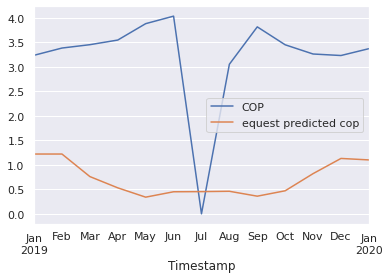

In [ ]:
m.loc[:,["COP", "equest predicted cop"]].plot()

# Adding Mode column to dataset

In [ ]:
HP_mode  = []
for value in df["Heat_EnPro(Wh)"]:
  if value != 0:
    HP_mode.append("Heating")
  else:
    HP_mode.append("Hot water")
df["mode"] = HP_mode

#Defining Temperature Range

In [ ]:
temp_range = []
for temp in df["Ave_Tout(C)"]:
  if temp <= 5:
    temp_range.append("Less than 5")
  elif  5 < temp <=10:
    temp_range.append("5-10")
  elif 10 < temp <=15 :
    temp_range.append("10-15")
  elif 15 < temp <=20 :
    temp_range.append("15-20")
  elif 20 < temp <=25 :
    temp_range.append("20-25")
  elif temp >25 :
    temp_range.append("More than 25")
  
df["temp_range"] = temp_range

### Line plot 

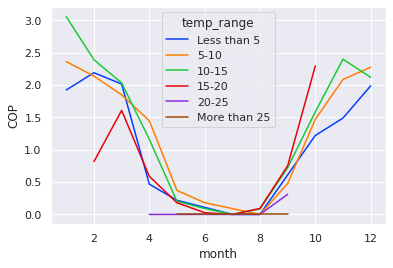

In [ ]:
sns.lineplot(x = "month", y = "COP", data = df,  hue = "temp_range", hue_order=["Less than 5", "5-10", "10-15", "15-20","20-25","More than 25"],ci= None, palette="bright")

In [ ]:
from google.colab import files

### Barplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

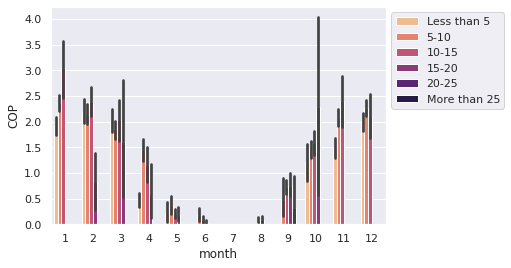

In [ ]:
sns.barplot(x = "month", y = "COP", data = df, hue = temp_range, hue_order=["Less than 5", "5-10", "10-15", "15-20","20-25","More than 25"], palette= "magma_r")
plt.legend(bbox_to_anchor=(1, 1)) 
plt.savefig("barplot.png", dpi = 600, bbox_to_anchor = "tight")
files.download("barplot.png")

# HDD calculation

In [ ]:
df.head()

,year,month,day,hour,Ave_Tout(C),Heat_EnCon(Wh),Heat_EnPro(Wh),HW_EnCon(Wh),HW_EnPro(Wh),Comb_EnCon(Wh),Comb_EnPro(Wh),COP_Heat,COP_HW,COP,mode,temp_range
Timestamp,,,,,,,,,,,,,,,,
2019-01-10 12:00:00,2019.0,1,10,12.0,10.937500,0.0,0.0,247.0,747.0,247.0,747.0,0.000000,3.024291,3.024291,Hot water,10-15
2019-01-10 13:00:00,2019.0,1,10,13.0,10.245614,1287.0,5813.0,0.0,0.0,1287.0,5813.0,4.516706,0.000000,4.516706,Heating,10-15
2019-01-10 14:00:00,2019.0,1,10,14.0,10.166667,1103.0,4694.0,0.0,0.0,1103.0,4694.0,4.255666,0.000000,4.255666,Heating,10-15
2019-01-10 15:00:00,2019.0,1,10,15.0,10.150000,1173.0,4818.0,0.0,0.0,1173.0,4818.0,4.107417,0.000000,4.107417,Heating,10-15
2019-01-10 16:00:00,2019.0,1,10,16.0,9.416667,1156.0,4700.0,0.0,0.0,1156.0,4700.0,4.065744,0.000000,4.065744,Heating,5-10


In [ ]:
df["HDH"] = 15.5 - df["Ave_Tout(C)"] 

In [ ]:
df["HDH"][df["HDH"] <  0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,year,month,day,hour,Ave_Tout(C),Heat_EnCon(Wh),Heat_EnPro(Wh),HW_EnCon(Wh),HW_EnPro(Wh),Comb_EnCon(Wh),Comb_EnPro(Wh),COP_Heat,COP_HW,COP,mode,temp_range,HDH
Timestamp,,,,,,,,,,,,,,,,,
2019-01-10 12:00:00,2019.0,1,10,12.0,10.937500,0.0,0.0,247.0,747.0,247.0,747.0,0.000000,3.024291,3.024291,Hot water,10-15,4.562500
2019-01-10 13:00:00,2019.0,1,10,13.0,10.245614,1287.0,5813.0,0.0,0.0,1287.0,5813.0,4.516706,0.000000,4.516706,Heating,10-15,5.254386
2019-01-10 14:00:00,2019.0,1,10,14.0,10.166667,1103.0,4694.0,0.0,0.0,1103.0,4694.0,4.255666,0.000000,4.255666,Heating,10-15,5.333333
2019-01-10 15:00:00,2019.0,1,10,15.0,10.150000,1173.0,4818.0,0.0,0.0,1173.0,4818.0,4.107417,0.000000,4.107417,Heating,10-15,5.350000
2019-01-10 16:00:00,2019.0,1,10,16.0,9.416667,1156.0,4700.0,0.0,0.0,1156.0,4700.0,4.065744,0.000000,4.065744,Heating,5-10,6.083333


# Adding day of the week 

In [ ]:
df["Weekday Name"] = df.index.day_name()

In [ ]:
df.head()

,year,month,day,hour,Ave_Tout(C),Heat_EnCon(Wh),Heat_EnPro(Wh),HW_EnCon(Wh),HW_EnPro(Wh),Comb_EnCon(Wh),Comb_EnPro(Wh),COP_Heat,COP_HW,COP,mode,temp_range,HDH,Weekday Name
Timestamp,,,,,,,,,,,,,,,,,,
2019-01-10 12:00:00,2019.0,1,10,12.0,10.937500,0.0,0.0,247.0,747.0,247.0,747.0,0.000000,3.024291,3.024291,Hot water,10-15,4.562500,Thursday
2019-01-10 13:00:00,2019.0,1,10,13.0,10.245614,1287.0,5813.0,0.0,0.0,1287.0,5813.0,4.516706,0.000000,4.516706,Heating,10-15,5.254386,Thursday
2019-01-10 14:00:00,2019.0,1,10,14.0,10.166667,1103.0,4694.0,0.0,0.0,1103.0,4694.0,4.255666,0.000000,4.255666,Heating,10-15,5.333333,Thursday
2019-01-10 15:00:00,2019.0,1,10,15.0,10.150000,1173.0,4818.0,0.0,0.0,1173.0,4818.0,4.107417,0.000000,4.107417,Heating,10-15,5.350000,Thursday
2019-01-10 16:00:00,2019.0,1,10,16.0,9.416667,1156.0,4700.0,0.0,0.0,1156.0,4700.0,4.065744,0.000000,4.065744,Heating,5-10,6.083333,Thursday


# OLS Regression Temp v/s COP with zeroes

In [ ]:
import plotly.express as px
fig1 = px.scatter(df, x = "Ave_Tout(C)", y = "COP", trendline = "ols", color="Weekday Name" )
fig1.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### OLS after dropping zeroes

In [ ]:
z = df[df["COP"] > 0]
fig4 = px.scatter(z, x = "Ave_Tout(C)", y = "COP", trendline="ols", color = "Weekday Name")
fig4.show()

In [ ]:
mask = z["Weekday Name"] == "Monday"
z.loc[mask, "COP"] += 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig4 = px.scatter(z, x = "Ave_Tout(C)", y = "COP", trendline="ols")
fig4.show()

In [ ]:
fig4 = px.scatter(z, x = "Ave_Tout(C)", y = "COP", trendline="ols", color = "Weekday Name")
fig4.show()

## Daily regression COP v/s temp

In [ ]:
d = df.resample("D").mean()
d["Weekday Name"] = d.index.day_name()

In [ ]:
fig5 = px.scatter(d, x = "Ave_Tout(C)", y = "COP", color = "Weekday Name", trendline= "ols")
fig5.show()

In [ ]:
z1 = d[d["COP"] > 0]

In [ ]:
d["Weekday Name"].value_counts()

Thursday     53
Friday       53
Monday       52
Saturday     52
Tuesday      52
Wednesday    52
Sunday       52
Name: Weekday Name, dtype: int64

# OLS Regression HDH v/s COP

In [ ]:
fig2 = px.scatter(df, x = "HDH", y = "COP", trendline="ols", hover_data=["year", "month", "day", "hour", "mode"])
fig2.show()

In [ ]:
fig5 = px.scatter(z, x = "HDH", y = "COP", trendline="ols", trendline_color_override= "red")
fig5.show()

# OLS Regression HDD v/s COP

In [ ]:
temp1 = df.resample("D").mean()

In [ ]:
fig3 = px.scatter(temp1, x = "HDH", y = "COP", trendline="ols")
fig3.show()

# Time series HHD and COP

Creating a temporary dataframe with the required variables 

In [ ]:
temp = df[["Ave_Tout(C)", "COP", "HDH"]]

## Daily frequency line plot

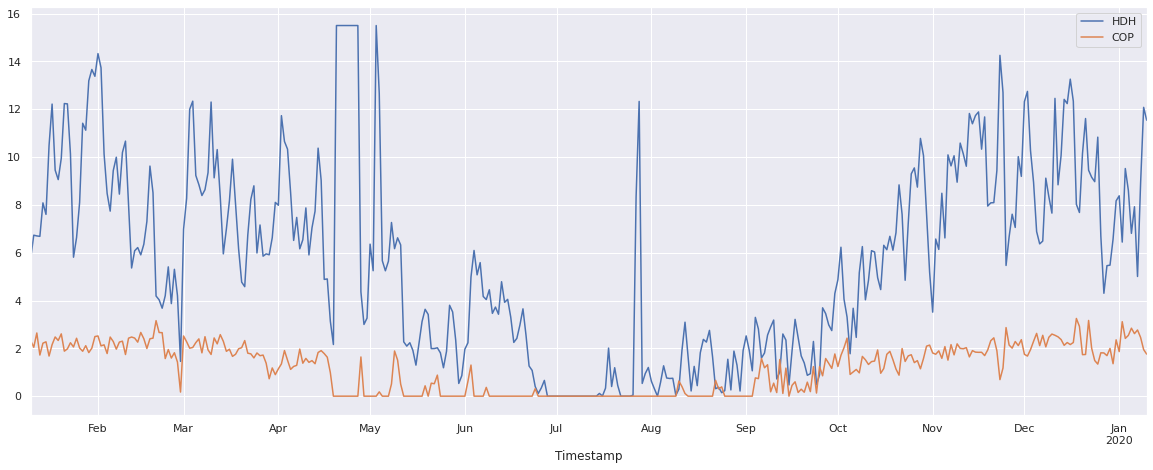

In [ ]:
d = temp.resample("D").mean()
d.loc[:, ["HDH", "COP"]].plot(figsize = (20,7.5))

## Weekly Frequency Plot

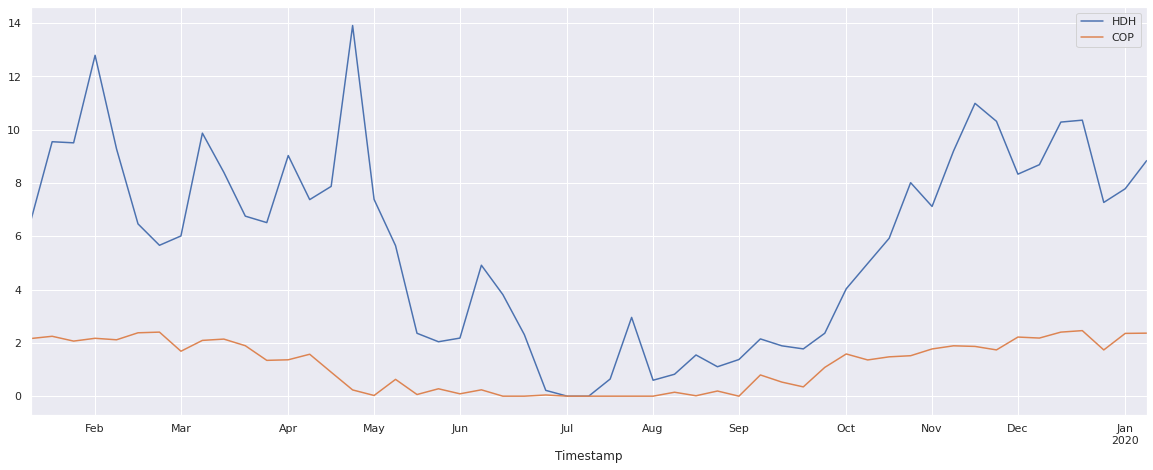

In [ ]:
w = temp.resample("W").mean()
w.loc[:, ["HDH", "COP"]].plot(figsize = (20,7.5))

## Monthly Frequency graph

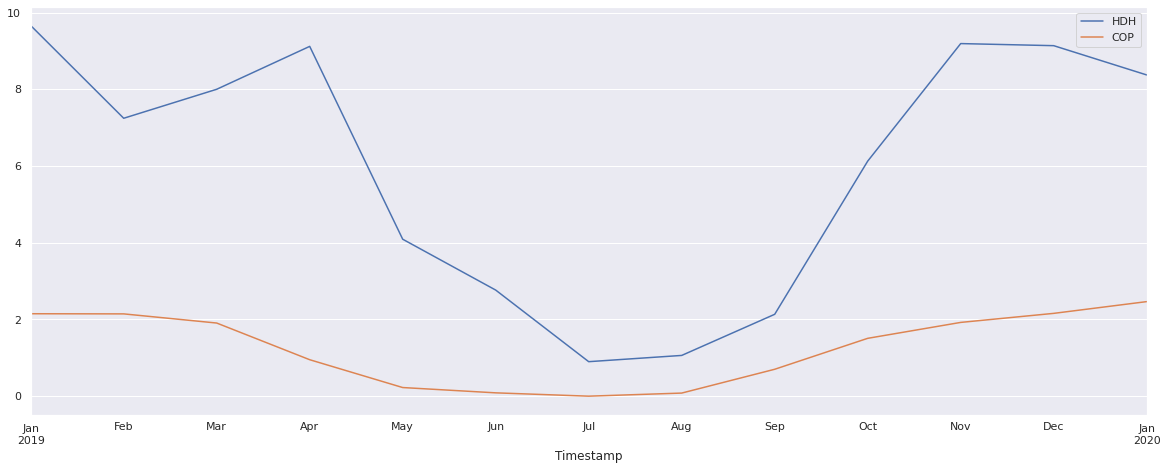

In [ ]:
m = temp.resample("M").mean()
m.loc[:, ["HDH", "COP"]].plot(figsize = (20,7.5))

# Statmodel regression

In [ ]:
import statsmodels.api as sm

In [ ]:
# Regression with zero COP v/s temperature 
X = df["Ave_Tout(C)"]
Y = df["COP"]

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    COP   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     973.6
Date:                Tue, 08 Sep 2020   Prob (F-statistic):          9.02e-203
Time:                        06:33:51   Log-Likelihood:                -16553.
No. Observations:                8761   AIC:                         3.311e+04
Df Residuals:                    8759   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1060      0.035     60.288      

In [ ]:
# Regression without zeroes COP v/s temperature

X1 = z["Ave_Tout(C)"]
Y1 = z["COP"]

X1 = sm.add_constant(X1)

model = sm.OLS(Y1,X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    COP   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     1829.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):          4.25e-310
Time:                        06:38:46   Log-Likelihood:                -2152.5
No. Observations:                2894   AIC:                             4309.
Df Residuals:                    2892   BIC:                             4321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6101      0.023    114.347      

In [ ]:
# Regression with zeroes COP v/s HDH

X2 = df["HDH"]
Y2 = df["COP"]

X2 = sm.add_constant(X2)

model = sm.OLS(Y2, X2).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    COP   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     841.2
Date:                Tue, 08 Sep 2020   Prob (F-statistic):          1.08e-176
Time:                        06:45:26   Log-Likelihood:                -16613.
No. Observations:                8761   AIC:                         3.323e+04
Df Residuals:                    8759   BIC:                         3.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5171      0.028     18.500      0.0

In [ ]:
# Regression without zeroes HDH v/s COP

X3 = z["HDH"]
Y3 = z["COP"]

X3 = sm.add_constant(X3)

model = sm.OLS(Y3, X3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    COP   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     1838.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):          2.80e-311
Time:                        06:48:27   Log-Likelihood:                -2149.8
No. Observations:                2894   AIC:                             4304.
Df Residuals:                    2892   BIC:                             4315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4777      0.025    181.108      0.0

In [ ]:
# Regression of HDD v/s COP including zeroes

X4 = temp1["HDH"]
Y4 = temp1["COP"]

X4 = sm.add_constant(X4)

model = sm.OLS(Y4, X4).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    COP   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     189.8
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           4.73e-35
Time:                        06:55:58   Log-Likelihood:                -435.25
No. Observations:                 366   AIC:                             874.5
Df Residuals:                     364   BIC:                             882.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3543      0.072      4.943      0.0

In [ ]:
d = df.resample("D").mean()

In [ ]:
d["Weekday_name"] = d.index.day_name()

In [ ]:
d.head()

,year,month,day,hour,Ave_Tout(C),Heat_EnCon(Wh),Heat_EnPro(Wh),HW_EnCon(Wh),HW_EnPro(Wh),Comb_EnCon(Wh),Comb_EnPro(Wh),COP_Heat,COP_HW,COP,HDH,Weekday name
Timestamp,,,,,,,,,,,,,,,,
2019-01-10,2019.0,1,10,17.5,9.734704,691.083333,2848.500000,20.583333,62.250000,711.666667,2910.750000,2.072368,0.252024,2.324392,5.765296,Thursday
2019-01-11,2019.0,1,11,11.5,8.767585,546.958333,2140.458333,110.916667,284.791667,657.875000,2425.250000,1.938263,0.106984,2.045247,6.732415,Friday
2019-01-12,2019.0,1,12,11.5,8.798611,715.083333,2837.958333,135.916667,356.958333,851.000000,3194.916667,2.533164,0.109429,2.642594,6.701389,Saturday
2019-01-13,2019.0,1,13,11.5,8.815972,583.541667,2218.208333,180.166667,488.708333,763.708333,2706.916667,1.728808,0.113022,1.719653,6.684028,Sunday
2019-01-14,2019.0,1,14,11.5,7.415972,858.791667,3368.041667,138.375000,368.791667,997.166667,3736.833333,2.248731,0.111048,2.216487,8.084028,Monday


# 